# Correlation and Regression

In today's lab, we will learn to [quantify the association between two variables](https://www.inferentialthinking.com/chapters/15/1/correlation.html) and [predict one variable based on another one](https://www.inferentialthinking.com/chapters/15/2/Regression_Line.html).

In [1]:
# Run this cell, but please don't change it.

# These lines import the Numpy and Datascience modules.
import numpy as np
from datascience import *

# These lines do some fancy plotting magic.
import matplotlib
%matplotlib inline
import matplotlib.pyplot as plots
plots.style.use('fivethirtyeight')
import warnings
warnings.simplefilter('ignore', FutureWarning)

# 1. How Faithful is Old Faithful? 

(Note: clever title comes from [here](http://web.pdx.edu/~jfreder/M212/oldfaithful.pdf).)

Old Faithful is a geyser in Yellowstone National Park in the central United States.  It's famous for erupting on a fairly regular schedule.  You can see a video below.

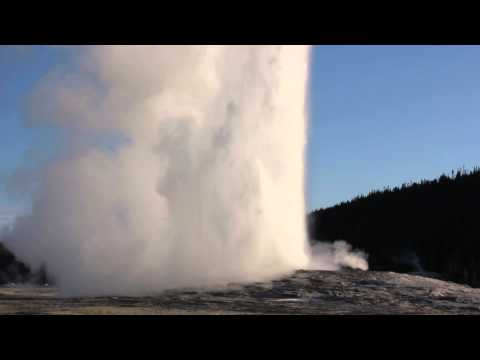

In [2]:
# For the curious: this is how to display a YouTube video in a
# Jupyter notebook.  The argument to YouTubeVideo is the part
# of the URL (called a "query parameter") that identifies the
# video.  For example, the full URL for this video is:
#   https://www.youtube.com/watch?v=wE8NDuzt8eg
from IPython.display import YouTubeVideo
YouTubeVideo("wE8NDuzt8eg")

Some of Old Faithful's eruptions last longer than others.  When it has a long eruption, there's generally a longer wait until the next eruption.

If you visit Yellowstone, you might want to predict when the next eruption will happen, so you can see the rest of the park and come to see the geyser when it happens.  Today, we will use a dataset on eruption durations and waiting times to see if we can make such predictions accurately with linear regression.

The dataset has one row for each observed eruption.  It includes the following columns:
- **duration**: Eruption duration, in minutes.
- **wait**: Time between this eruption and the next, also in minutes.

Run the next cell to load the dataset.

In [3]:
faithful = Table.read_table("faithful.csv")
faithful

duration,wait
3.6,79
1.8,54
3.333,74
2.283,62
4.533,85
2.883,55
4.7,88
3.6,85
1.95,51
4.35,85


We would like to use linear regression to make predictions, but that won't work well if the data aren't roughly linearly related.  To check that, we should look at the data.

#### Question 1
Make a scatter plot of the data.  It's conventional to put the column we will try to predict on the vertical axis and the other column on the horizontal axis.

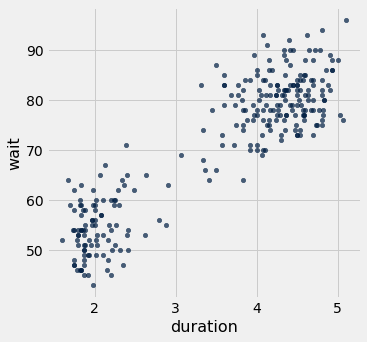

In [4]:
faithful.scatter('duration', 'wait')

#### Question 2
Look at the scatter plot. Are eruption duration and waiting time roughly linearly related?  Is the relationship positive, as we claimed earlier?  You may want to consult this [section](https://www.inferentialthinking.com/chapters/15/prediction.html) of the textbook for the definition of a linear association.

*Write your answer here, replacing this text.*

#### Question 3
We're going to continue with the provisional assumption that they are linearly related, so it's reasonable to use linear regression to analyze this data.
We'd next like to plot the data in standard units.  Recall that, if `nums` is an array of numbers, then

    (nums - mean of values in nums) / (standard deviation of values in nums)

is an array of those numbers in standard units. Write a function `standard_unit` that takes an array and returns that array in standard units.

In [8]:
def standard_unit(nums):
    return (nums - np.mean(nums)) / np.std(nums)

a = make_array(1, 2, 3)
standard_unit(a)

array([-1.22474487,  0.        ,  1.22474487])

#### Question 4
Create a table called `faithful_standard` containing the eruption durations and waiting times in standard units.  (The columns should be named "duration (standard units)" and "wait (standard units)".

In [10]:
faithful_standard = Table().with_columns(
    "duration (standard units)", standard_unit(faithful.column('duration')),
    "wait (standard units)", standard_unit(faithful.column('wait')))
faithful_standard


duration (standard units),wait (standard units)
0.0984989,0.597123
-1.48146,-1.24518
-0.135861,0.228663
-1.0575,-0.655644
0.917443,1.03928
-0.530851,-1.17149
1.06403,1.26035
0.0984989,1.03928
-1.3498,-1.46626
0.756814,1.03928


#### Question 5
Plot the scatter of data again, but this time in standard units.

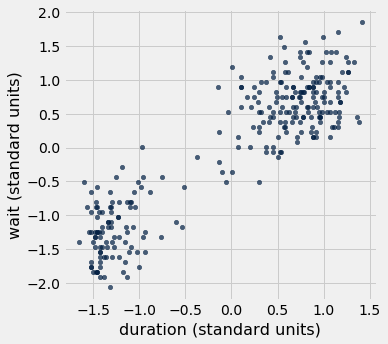

In [11]:
faithful_standard.scatter(0, 1)

You'll notice that this plot looks exactly the same as the last one! But the axes are scaled differently.  (The method `scatter` scales the axes so the data fill up the available space.)  So it's important to read the ticks on the axes.

#### Question 6
Among the following numbers, which would you guess is closest to the correlation between eruption duration and waiting time in this dataset?

* -1
* 0
* 1

*Write your answer here, replacing this text.*

#### Question 7
Compute the correlation coefficient `r`.  

*Hint:* Use `faithful_standard`.  This [section](https://www.inferentialthinking.com/chapters/15/1/correlation.html) on correlation explains how to do this: **r
  is the average of the products of the two variables, when both variables are measured in standard units.**

In [12]:
r = np.mean(faithful_standard.column(0) * faithful_standard.column(1))
r

0.9008111683218132

#### Question 8
The initial goal was to prdiect the next waiting time based on the last observed eruption duration. To fit a linear regression line, calculate the slope and intercept of the regression line according to the following formulas:

$$ slope = r * \frac{\text{standard deviaion of } y}{\text{standard deviation of } x} $$
$$ intercept = \text{average of } y - slope * \text{average of } x $$ 

In [13]:
slope = r * np.std(faithful.column('wait')) / np.std(faithful.column('duration'))
intercept = np.mean(faithful.column('wait')) - slope * np.mean(faithful.column('duration'))
print(slope, intercept)

10.729641395133529 33.474397022753344


#### Question 9
Write a function `predict` that takes a `duration` and returns a predicted waiting time. Call your function with the duration time 3.5 minutes as input and report the predicted waiting time.

In [16]:
#slope = 22
#intercept = 30

def predict(duration):
    wait = slope * duration + intercept
    return wait
    

predict(3.5)

107.0

#### Question 10
One way to evaluate your regression model is to calculate *Root Mean Squered Error (RMSE)*:
$$ RMSE = \sqrt{np.mean((y - \hat{y}) ^ 2)}, $$
where $ y $ is the array of actual target values and $ \hat{y} $ is the array of predicted target values. Calculate *RMSE* of your regression model on the dataset. 

In [17]:
rmse = (np.mean((faithful.column('wait') - faithful.apply(predict, 'duration')) ** 2)) ** 0.5
rmse

38.51845641931243

That's it! You've completed this lab. 